In [1]:
import wisps
import pandas as pd
import splat
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def proper_classification(sp):
    """
    Uses splat.classifyByStandard to classify spectra using spex standards
    """ 
    val=wisps.classify(sp, stripunits=True)
    return val

def combine_two_spectra(sp10, sp20):
    """
    sp1 and sp2 are splat objects
    """
    sp1=sp10.splat_spectrum
    sp2=sp20.splat_spectrum
    
    sp1.fluxCalibrate('2MASS J',  wisps.absolute_magnitude_jh(wisps.make_spt_number(sp10.spectral_type))[0])
    sp2.fluxCalibrate('2MASS J',  wisps.absolute_magnitude_jh(wisps.make_spt_number(sp20.spectral_type))[0])
    
    sp3=sp1+sp2
    types={}
    types={'primary': [sp10.spectral_type, sp20.spectral_type], 
           'system': proper_classification(sp3),
           'spectrum': sp3}
    return types

In [49]:
sp=splat.getSpectrum(lucky=True)[0]


Retrieving 1 lucky file



(0.0, 1.5)

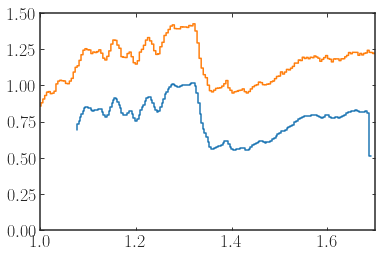

In [51]:
fig, ax=plt.subplots()

sp.toInstrument('WFC3')
ax.step(sp.wave, sp.flux)
sp.reset()
ax.step(sp.wave.value, sp.flux.value+0.4)
ax.set_xlim([1.0, 1.7])
ax.set_ylim([0.0, 1.5])

In [27]:
splat.INSTRUMENTS['WFC3-G141']

{'instrument_name': 'HST WFC3 IR G141',
 'pixelscale': <Quantity 0.128 arcsec>,
 'wave_range': <Quantity [1.075, 1.7  ] micron>,
 'slitwidth': <Quantity 0.3 arcsec>,
 'resolution': 130.0,
 'norders': 7,
 'readnoise': 0.0,
 'darkcurrent': 0.0,
 'gain': 1.0,
 'altname': ['WFC3', 'HST WFC3', 'HST WFC3 IR', 'WFC3 IR', 'G141'],
 'wunit': Unit("micron"),
 'funit': Unit("erg / (cm2 micron s)")}